In [59]:
import pandas as pd 
import os 
import networkx as nx 
import csv
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data=pd.read_csv('Downloads/ratings_Beauty.csv/ratings_Beauty.csv')

In [4]:
data.sample(5)

,UserId,ProductId,Rating,Timestamp
635350,A2WQVNZB86K8V9,B001CENUPU,4.0,1393545600
1349790,A2NSCO12WIT6QZ,B0052D4416,5.0,1395532800
1442649,A3KQQNTKBFOOZC,B005SBCNHE,5.0,1377475200
2008528,A37FADLGGTO8Z0,B00IPJW62I,5.0,1383264000
1126163,A1DM8AJ8OPCXN2,B003XWG880,5.0,1396742400


In [5]:
data.shape

(2023070, 4)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
UserId       object
ProductId    object
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


# Distribution of Rating 

Text(0.5, 0, 'Rating')

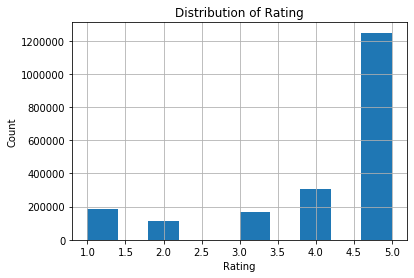

In [25]:
data.Rating.hist()
plt.title('Distribution of Rating')
plt.ylabel('Count')
plt.xlabel('Rating')

In [24]:

data.Rating.describe()


count   2,023,070.00
mean            4.15
std             1.31
min             1.00
25%             4.00
50%             5.00
75%             5.00
max             5.00
Name: Rating, dtype: float64

Most of the rating values are above 4. There are almost 200,000 items that received rating of 1. And, almost 300,000 items rated as 4. 

# Number of times that the product is rated and average rating per product 

In [28]:
rating=pd.DataFrame(data.groupby('ProductId')['Rating'].agg(['mean','count']).sort_values(by='count',ascending=False).head(10))

In [29]:
rating.head(10)

,mean,count
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
B000ZMBSPE,4.422342,2041
B003BQ6QXK,4.625652,1918
B004OHQR1Q,4.465782,1885
B00121UVU0,4.538085,1838


Text(0, 0.5, 'Count')

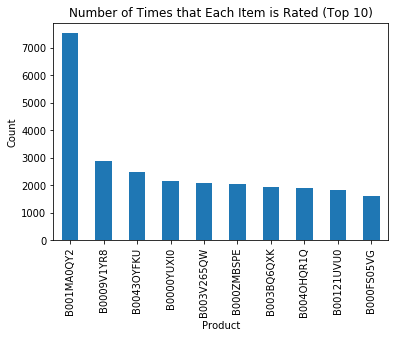

In [92]:
rating['count'].plot(kind='bar')
plt.title('Number of Times that Each Item is Rated (Top 10)')
plt.xlabel('Product')
plt.ylabel('Count')

The most rated product is "B001MA0QY2" with 7553 ratings followed by  'B001MA0QY2' with 2869 ratings.

# Average ratings and Counts 

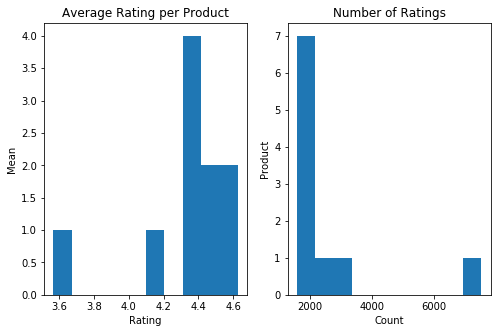

In [46]:
fig, [ax1,ax2]=plt.subplots(nrows=1, ncols=2, figsize=(8,5))
ax1.hist(rating['mean'])
ax2.hist(rating['count'])
ax1.set_title('Average Rating per Product')
ax2.set_title('Number of Ratings')
ax1.set_xlabel('Rating')
ax2.set_xlabel('Count')
ax1.set_ylabel('Mean')
ax2.set_ylabel('Product')
plt.show()



The average rating values are mostly above 4.3. The minimum average rating is 3.6. In the second bar graph, we see that there is one product that is rated more than 7000 times with the average rating 4.32. 

# Average Rating and the Number of Ratings by Each User

In [69]:
users=data.groupby('UserId')['Rating'].agg(['mean','count'])

In [87]:
# Users with maximum number of ratings
top10_users=users.sort_values(by='count', ascending=False).head(10)
top10_users

,mean,count
UserId,,
A3KEZLJ59C1JVH,3.70,389
A281NPSIMI1C2R,4.79,336
A3M174IC0VXOS2,4.41,326
A2V5R832QCSOMX,4.42,278
A3LJLRIZL38GG3,4.55,276
ALQGOMOY1F5X9,2.22,275
AKMEY1BSHSDG7,4.62,269
A3R9H6OKZHHRJD,3.97,259
A1M04H40ZVGWVG,3.84,249


Text(0.5, 1.0, 'Maximum Number of Ratings by Users')

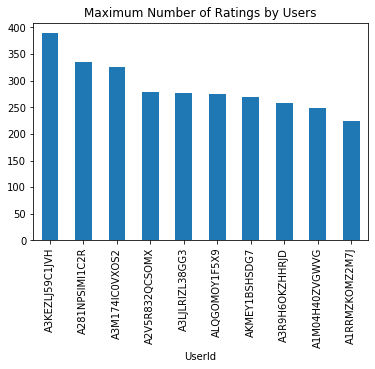

In [88]:
top10_users['count'].plot(kind='bar')
plt.title('Maximum Number of Ratings by Users')

Above, we see the average rating and the number of times that a user rated. As we can see that user 'A3KEZLJ59C1JVH' rated items 389 times with average rating of 3.7. There is a user who rated 275 times with average rating of 2.22